<a href="https://colab.research.google.com/github/beatrizmotta/ProjetoCienciaDeDados/blob/main/ProjetoCD_Fred_Bia_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código do projeto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import folium
from folium.plugins import HeatMap
import plotly.express as px

hotel_raw_df = pd.read_csv('sample_data/hotel_bookings.csv')


#### Análise antes para o pré-processamento

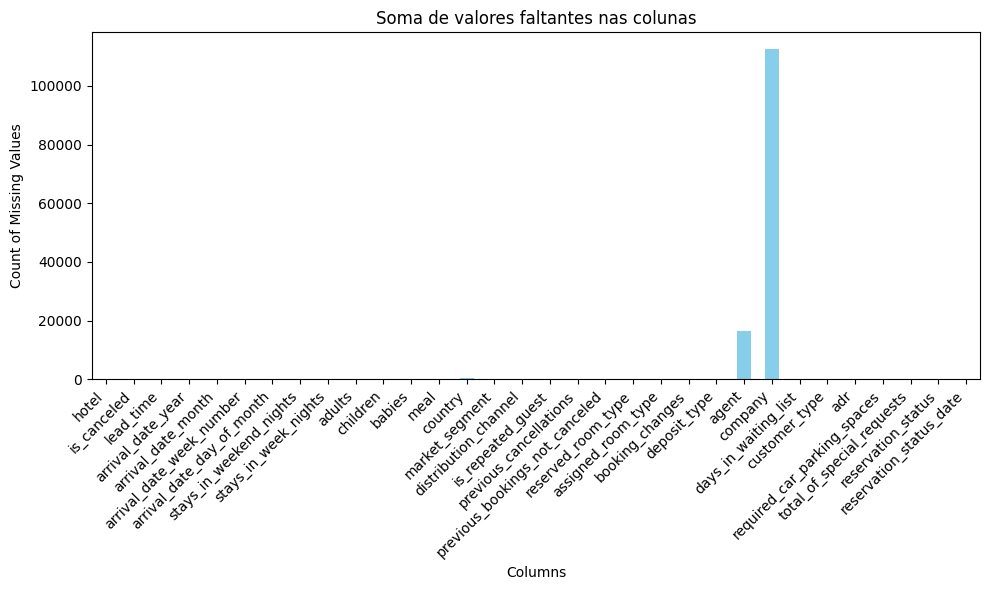

In [ ]:
missing_values_count = hotel_raw_df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Soma de valores faltantes nas colunas')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
hotel_raw_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Limpeza dos dados

In [ ]:
# Removendo as colunas "agent" e "company" que possuem muitos valores nulos
hotel_raw_df.drop("company", axis=1, inplace=True)
hotel_raw_df.drop("agent", axis=1, inplace=True)

# missing_values_count = hotel_raw_df.isnull().sum()

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# missing_values_count.plot(kind='bar', color='skyblue')
# plt.title('Soma de valores faltantes nas colunas')
# plt.xlabel('Columns')
# plt.ylabel('Count of Missing Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()




In [ ]:
# Removendo o restante das entradas que possuem valores nulos
hotel_raw_df.dropna(inplace=True)

# Removendo também as entradas que possuam os valores de adults, children
# e babies como 0, pois seria uma reserva inválida

filter = (hotel_raw_df.children == 0) & (hotel_raw_df.adults == 0) & (hotel_raw_df.babies == 0)
hotel_raw_df = hotel_raw_df[~filter]

# Removendo os dados duplicados
hotel_raw_df.drop_duplicates(inplace = True)

hotel_raw_df.shape

# Removendo outlier de children
hotel_raw_df = hotel_raw_df[(hotel_raw_df["children"] >= 0) & (hotel_raw_df["children"] <= 4)]

In [ ]:
# Criando o dataframe de variáveis categóricas

cat_cols = [col for col in hotel_raw_df.columns if hotel_raw_df[col].dtype == 'O']
cat_df = hotel_raw_df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [ ]:
# Encodando os valores das variáveis categórias de maneira a poder usar os
# algoritmos de ML mais para a frente

label_encoders = {}
for column in ["country", "hotel", "arrival_date_month", "meal",
               "distribution_channel", "market_segment",
               "assigned_room_type", "reserved_room_type",
               "reservation_status", "deposit_type", "customer_type", "reservation_status_date",
               "reservation_status_date", ]:
    label_encoders[column] = LabelEncoder()
    hotel_raw_df[column] = label_encoders[column].fit_transform(hotel_raw_df[column])

    if (column in cat_cols):
      cat_df[column] = hotel_raw_df[column]


hotel_raw_df.head()

<ipython-input-55-42f1b79809ab>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column] = hotel_raw_df[column]
<ipython-input-55-42f1b79809ab>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[column] = hotel_raw_df[column]
<ipython-input-55-42f1b79809ab>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


In [ ]:
# Criando o dataframe de variáveis numéricas
num_df = hotel_raw_df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [ ]:
# Variância das colunas numéricas
num_df.var()

lead_time                         7414.798822
arrival_date_year                    0.470498
arrival_date_week_number           186.299568
arrival_date_day_of_month           78.054222
stays_in_weekend_nights              1.049117
stays_in_week_nights                 4.120996
adults                               0.385896
children                             0.207943
babies                               0.012908
is_repeated_guest                    0.037231
previous_cancellations               0.136768
previous_bookings_not_canceled       2.955749
booking_changes                      0.506173
days_in_waiting_list               100.568045
adr                               3007.404211
required_car_parking_spaces          0.078713
total_of_special_requests            0.692194
dtype: float64

## Análise

#### Cancelamento

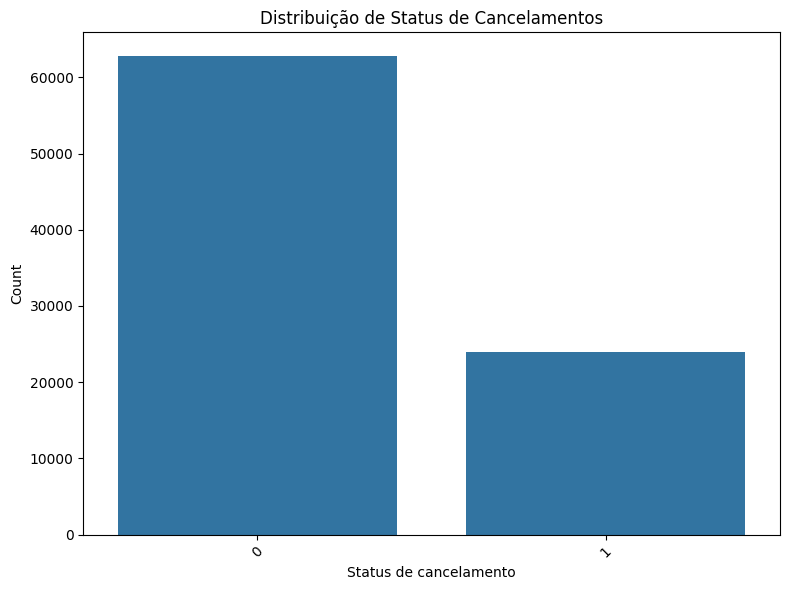

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=hotel_raw_df)

plt.title('Distribuição de Status de Cancelamentos')
plt.xlabel('Status de cancelamento')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()


#### Número de Reservas

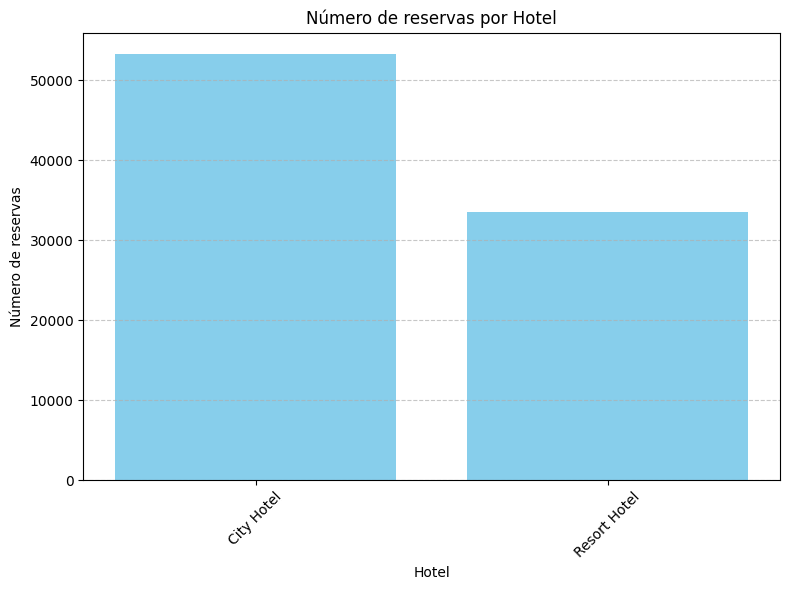

In [ ]:
hotel_type_counts = hotel_raw_df['hotel'].value_counts().reset_index()

hotel_type_counts.columns = ['encoded_hotel_type', 'Number of Reservations']

hotel_type_counts['hotel_type'] = label_encoders['hotel'].inverse_transform(hotel_type_counts['encoded_hotel_type'])

hotel_type_counts.drop(columns=['encoded_hotel_type'], inplace=True)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(hotel_type_counts['hotel_type'], hotel_type_counts['Number of Reservations'], color='skyblue')
plt.title('Número de reservas por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Número de reservas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

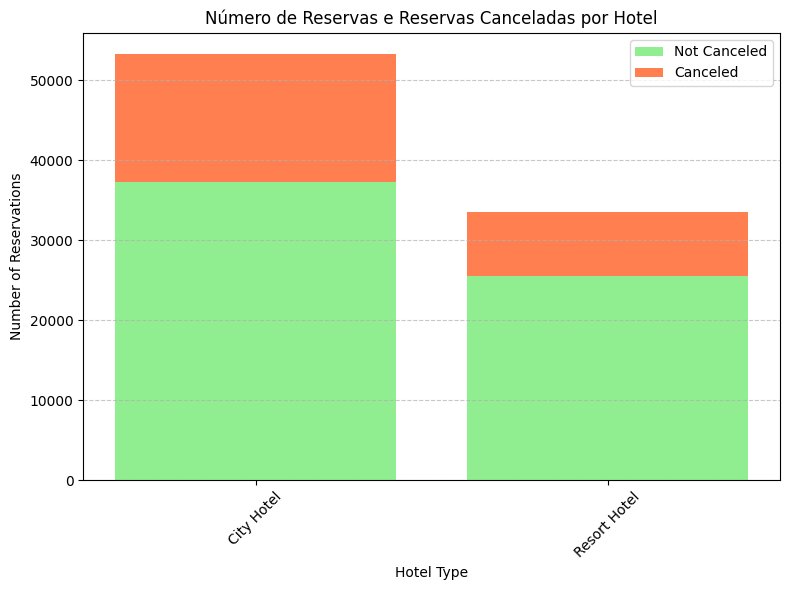

In [ ]:
reservations_per_hotel = hotel_raw_df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0).reset_index()

reservations_per_hotel['hotel_type'] = label_encoders['hotel'].inverse_transform(reservations_per_hotel['hotel'])

plt.figure(figsize=(8, 6))
plt.bar(reservations_per_hotel['hotel_type'], reservations_per_hotel[0], color='lightgreen', label='Not Canceled')
plt.bar(reservations_per_hotel['hotel_type'], reservations_per_hotel[1], bottom=reservations_per_hotel[0], color='coral', label='Canceled')
plt.title('Número de Reservas e Reservas Canceladas por Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Reservations')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Correlações

#### is_canceled

reservation_status               -0.888859
required_car_parking_spaces      -0.184015
total_of_special_requests        -0.122146
booking_changes                  -0.093694
is_repeated_guest                -0.089300
hotel                            -0.069510
assigned_room_type               -0.060118
previous_bookings_not_canceled   -0.050592
arrival_date_month               -0.044349
reservation_status_date          -0.034006
customer_type                    -0.031001
babies                           -0.021042
arrival_date_week_number          0.001089
days_in_waiting_list              0.004536
arrival_date_day_of_month         0.005327
meal                              0.045317
reserved_room_type                0.046926
previous_cancellations            0.050986
stays_in_weekend_nights           0.060373
children                          0.066786
adults                            0.078324
stays_in_week_nights              0.083985
arrival_date_year                 0.087723
country    

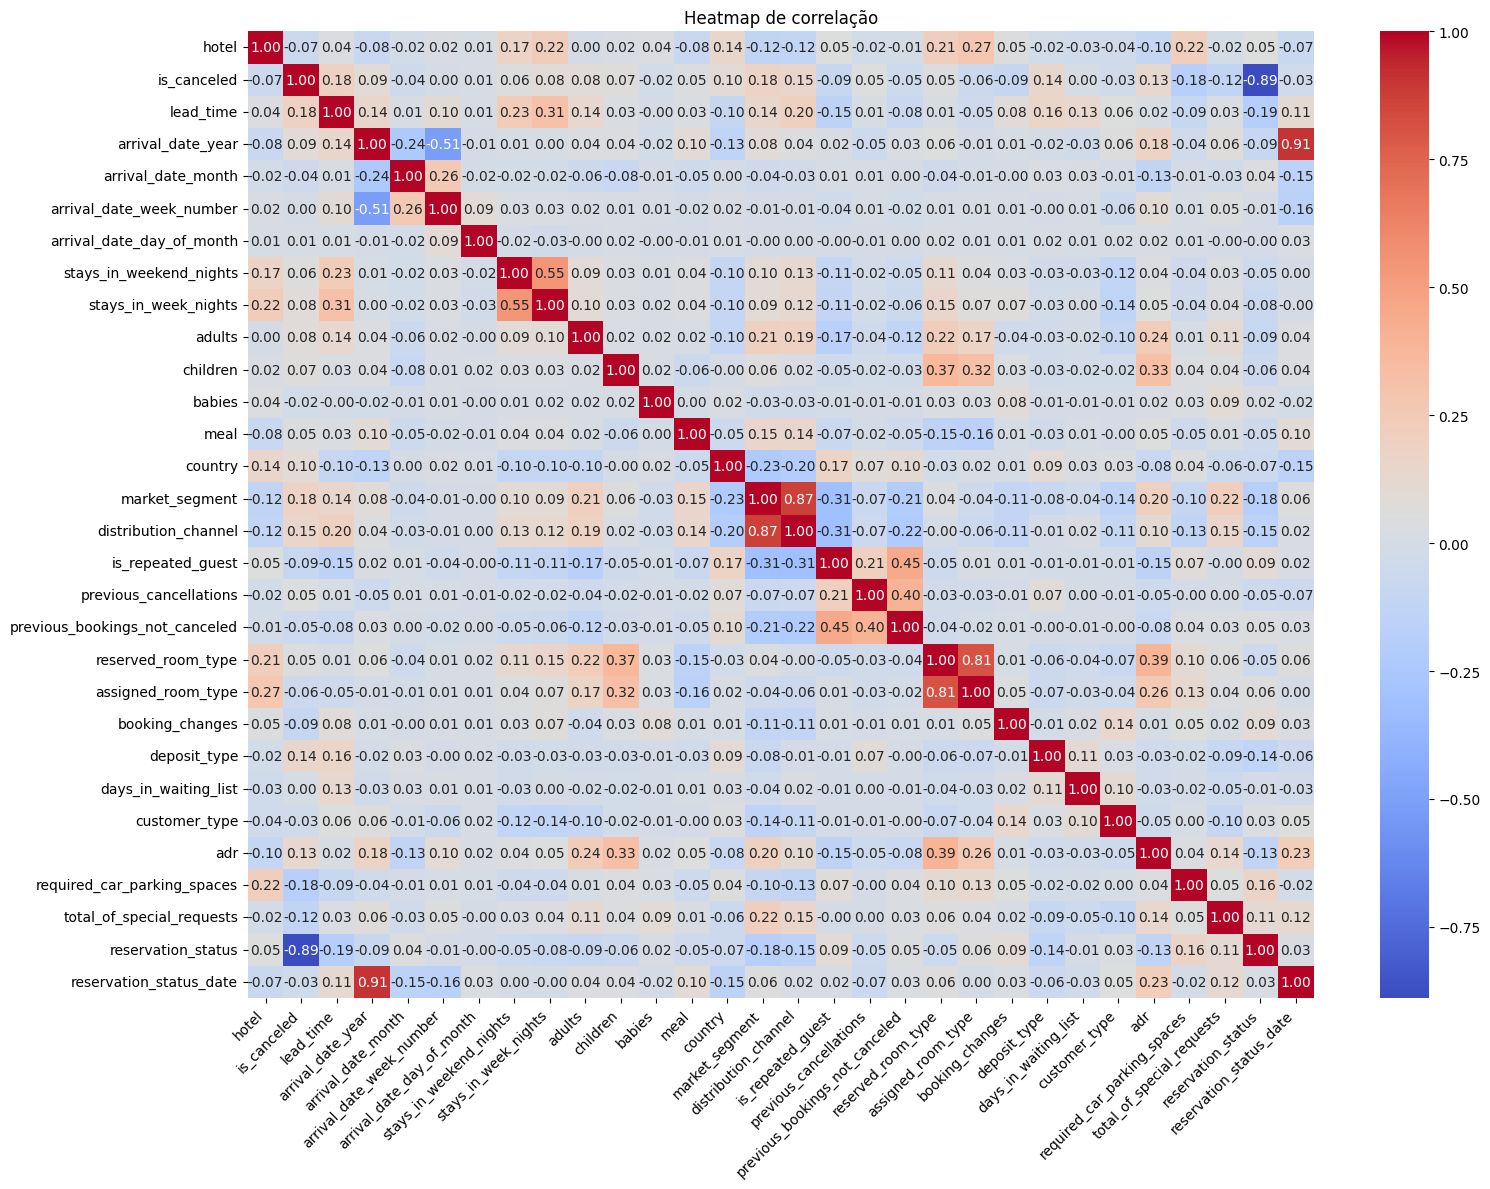

In [ ]:
correlation_matrix = hotel_raw_df.corr()
is_canceled_corr = correlation_matrix["is_canceled"]
is_canceled_corr.drop("is_canceled")
sorted_corr_is_canceled = is_canceled_corr.sort_values()

print(sorted_corr_is_canceled)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlação')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

##### is_canceled x lead_time

<ipython-input-206-158bee8e4665>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reservation Status', y='Mean Lead Time', data=mean_lead_time_df, palette='coolwarm')


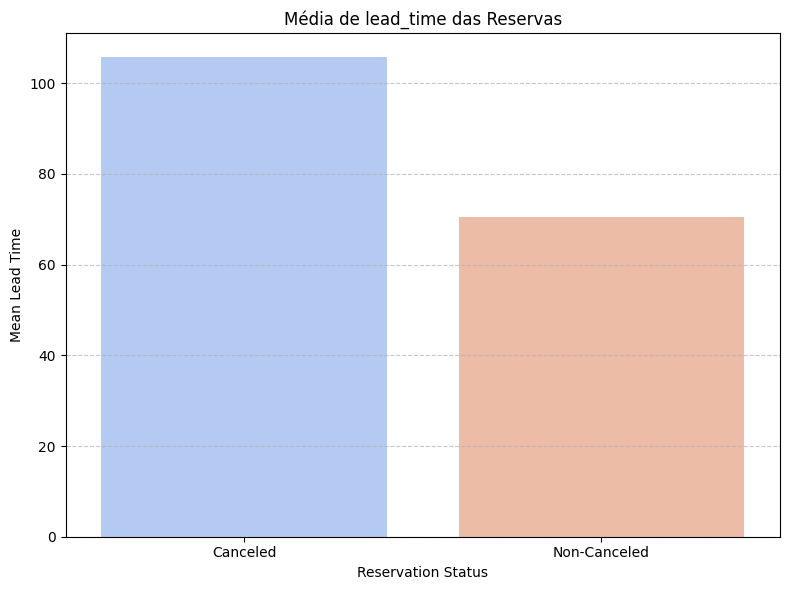

In [ ]:
mean_lead_time_canceled = hotel_raw_df[hotel_raw_df['is_canceled'] == 1]['lead_time'].mean()

mean_lead_time_non_canceled = hotel_raw_df[hotel_raw_df['is_canceled'] == 0]['lead_time'].mean()

mean_lead_time_df = pd.DataFrame({'Reservation Status': ['Canceled', 'Non-Canceled'],
                                  'Mean Lead Time': [mean_lead_time_canceled, mean_lead_time_non_canceled]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Reservation Status', y='Mean Lead Time', data=mean_lead_time_df, palette='coolwarm')
plt.title('Média de lead_time das Reservas')
plt.xlabel('Reservation Status')
plt.ylabel('Mean Lead Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### adr

is_repeated_guest                -0.150900
reservation_status               -0.128574
arrival_date_month               -0.127069
hotel                            -0.104041
previous_bookings_not_canceled   -0.083197
country                          -0.080991
previous_cancellations           -0.050317
customer_type                    -0.047671
deposit_type                     -0.033551
days_in_waiting_list             -0.032969
booking_changes                   0.009452
lead_time                         0.018143
arrival_date_day_of_month         0.022276
babies                            0.022544
stays_in_weekend_nights           0.037364
required_car_parking_spaces       0.040119
stays_in_week_nights              0.052648
meal                              0.053588
arrival_date_week_number          0.098480
distribution_channel              0.103560
is_canceled                       0.125695
total_of_special_requests         0.135933
arrival_date_year                 0.176506
market_segm

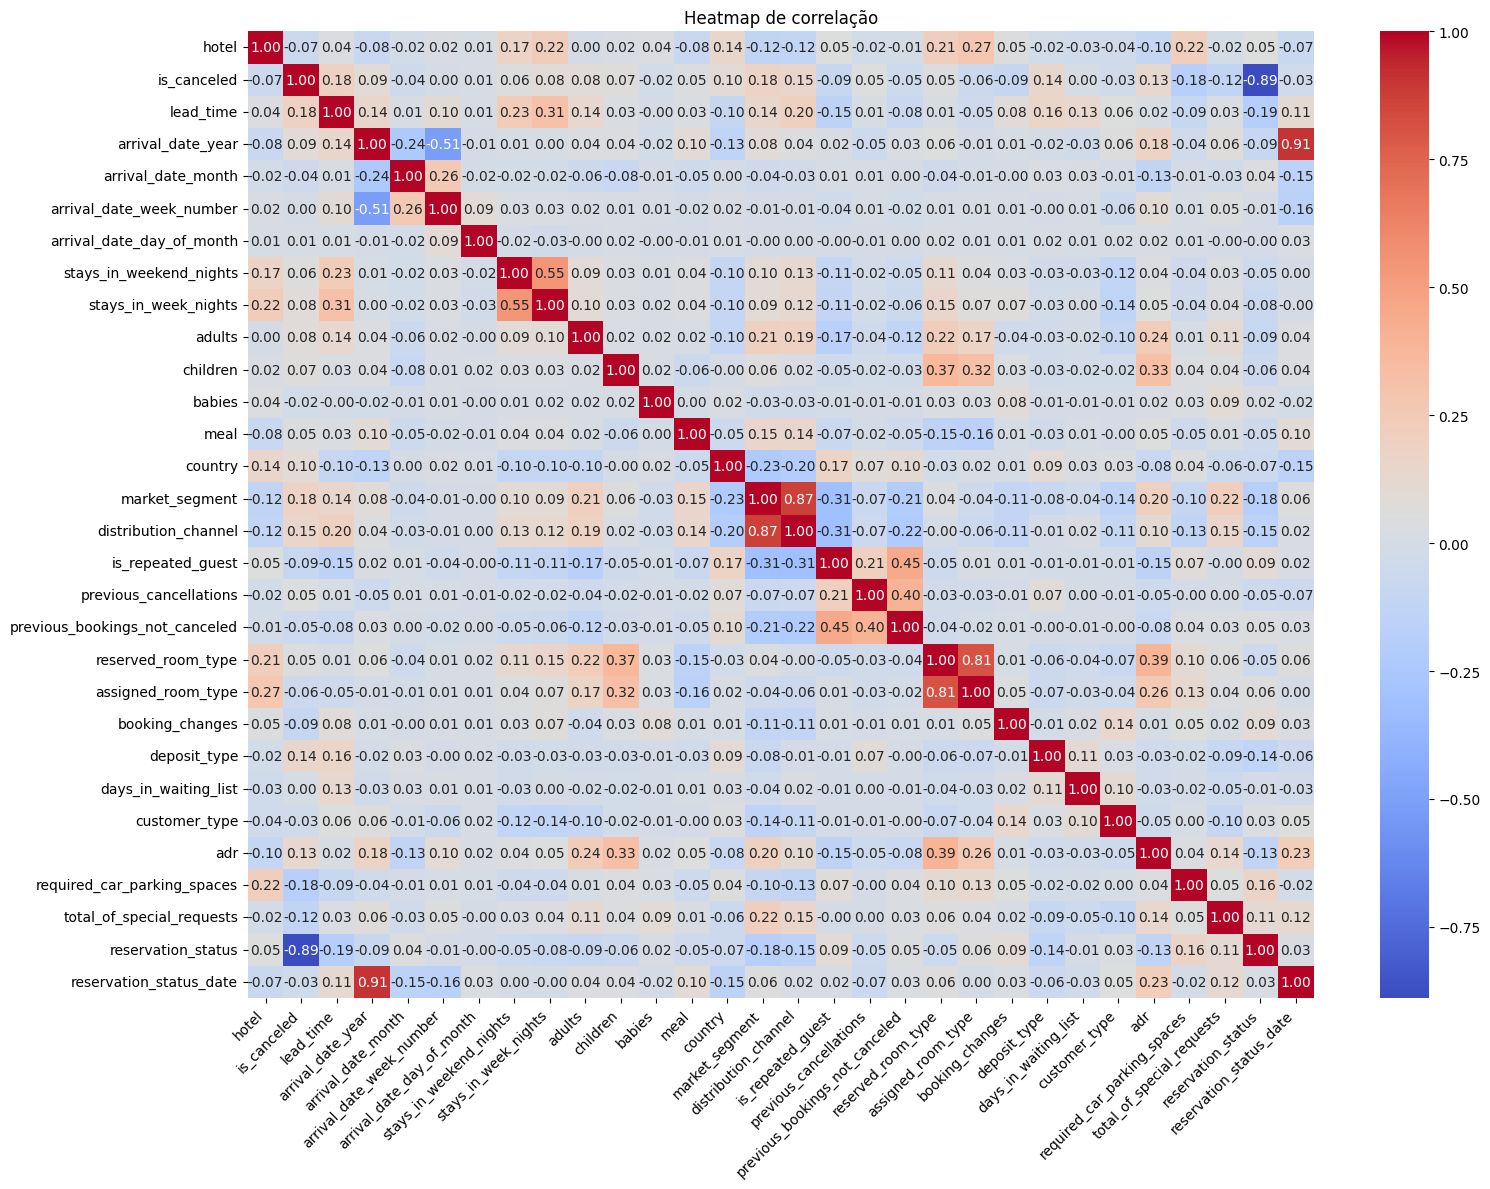

In [ ]:
correlation_matrix = hotel_raw_df.corr()
is_canceled_corr = correlation_matrix["adr"]
is_canceled_corr.drop("adr")
sorted_corr_is_canceled = is_canceled_corr.sort_values()

print(sorted_corr_is_canceled)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlação ADR')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

##### adr x children

Text(0.5, 1.0, 'Média ADR x Número de Crianças')

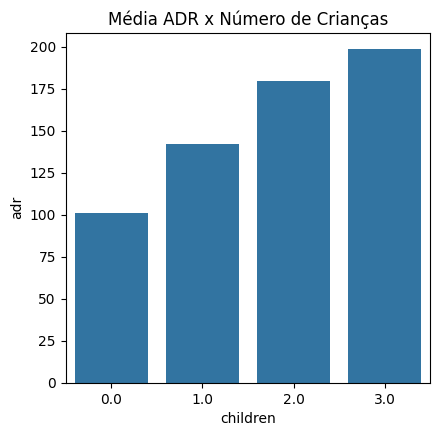

In [ ]:
children_adr_mean = hotel_raw_df.groupby('children')['adr'].mean().reset_index()

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.barplot(x='children', y='adr', data=children_adr_mean)
plt.title('Média ADR x Número de Crianças')

###### Verificando Outliers de Children

In [ ]:
hotel_raw_df["children"].unique()


array([ 0.,  1.,  2., 10.,  3.])

0.0     78400
1.0      4686
2.0      3591
3.0        75
10.0        1
Name: children, dtype: int64


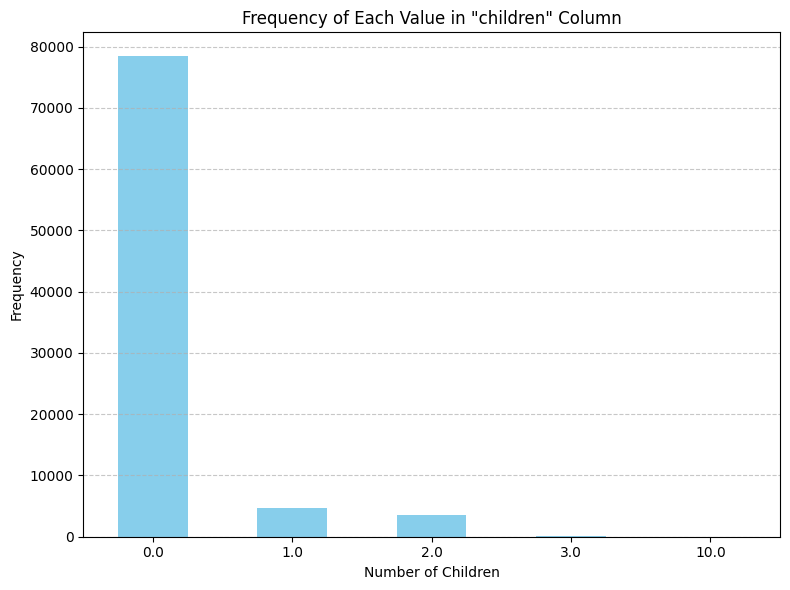

In [ ]:
children_frequency = hotel_raw_df["children"].value_counts()
print(children_frequency)

# Plotting the frequency of each value in 'children' column
plt.figure(figsize=(8, 6))
children_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Value in "children" Column')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

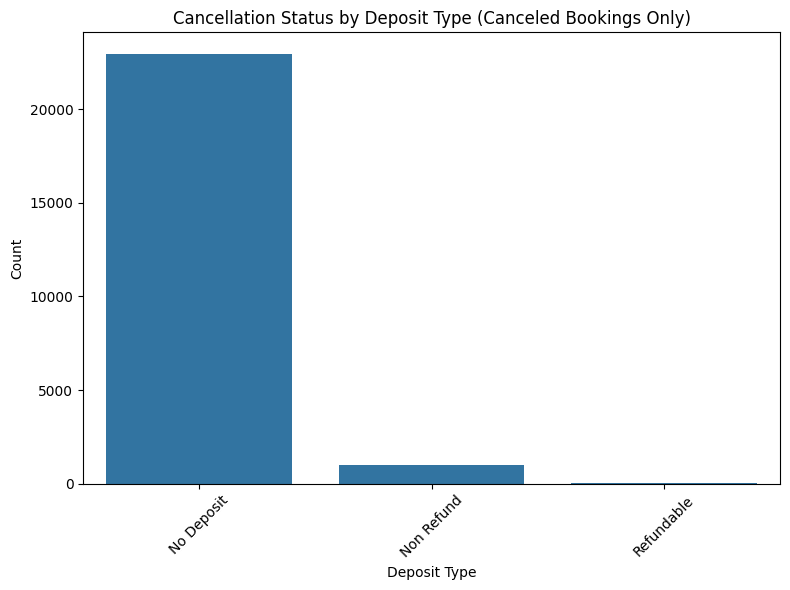

In [ ]:
canceled_bookings_df = hotel_raw_df[hotel_raw_df['is_canceled'] == 1]

decoded_deposit_type = label_encoders['deposit_type'].inverse_transform(canceled_bookings_df['deposit_type'].unique())

plt.figure(figsize=(8, 6))
sns.countplot(x='deposit_type', data=canceled_bookings_df)

plt.title('Cancellation Status by Deposit Type (Canceled Bookings Only)')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.xticks(canceled_bookings_df['deposit_type'].unique(), decoded_deposit_type, rotation=45)  # Set x-axis ticks with decoded labels
plt.tight_layout()

#### Reservas

###### Reservas x Mês da reserva

In [ ]:
hotel_classes = label_encoders['hotel'].classes_

# Print the classes along with their encoded values
for i, hotel_class in enumerate(hotel_classes):
    print(f"Encoded value for {hotel_class}: {i}")

Encoded value for City Hotel: 0
Encoded value for Resort Hotel: 1


<ipython-input-199-1e8f29a49293>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_df['arrival_month'] = label_encoders['arrival_date_month'].inverse_transform(city_hotel_df['arrival_date_month'])
<ipython-input-199-1e8f29a49293>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values, order=month_order, palette='viridis')


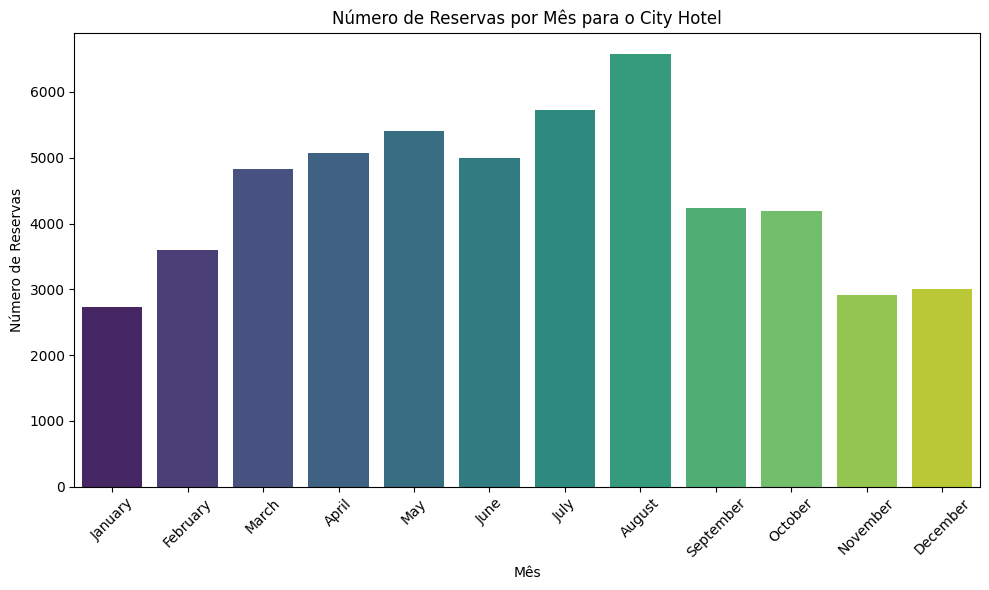

In [ ]:
city_hotel_df = hotel_raw_df[hotel_raw_df['hotel'] == 0]

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Decode the month labels
city_hotel_df['arrival_month'] = label_encoders['arrival_date_month'].inverse_transform(city_hotel_df['arrival_date_month'])

# Group the data by 'arrival_month' and count the number of reservations in each month
monthly_reservations = city_hotel_df.groupby('arrival_month').size()

# Plotting the count of reservations per month for the City Hotel
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values, order=month_order, palette='viridis')
plt.title('Número de Reservas por Mês para o City Hotel')
plt.xlabel('Mês')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-200-7da980856b4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_hotel_df['arrival_month'] = label_encoders['arrival_date_month'].inverse_transform(city_hotel_df['arrival_date_month'])
<ipython-input-200-7da980856b4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values, order=month_order, palette='viridis')


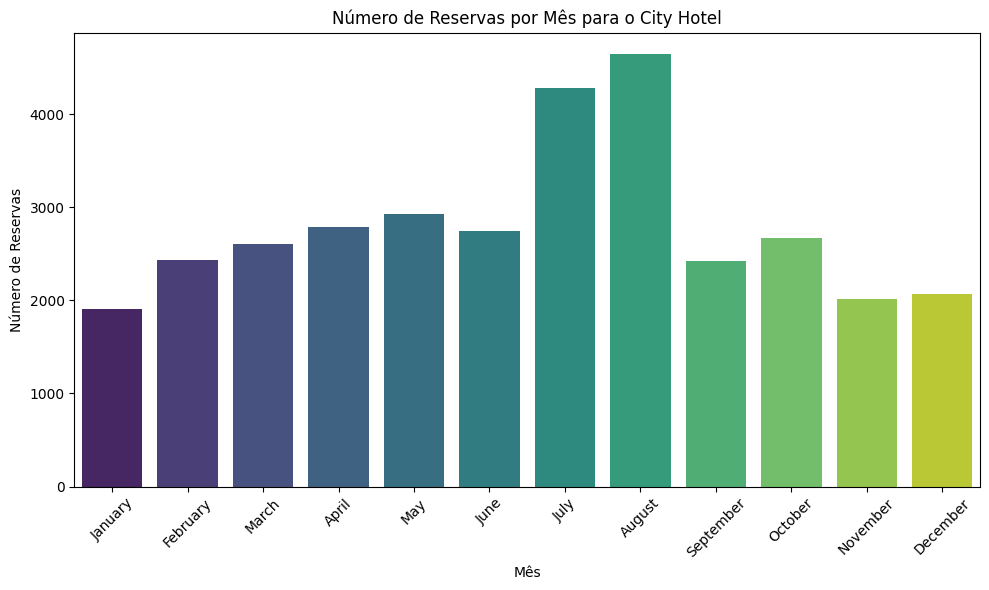

In [ ]:
city_hotel_df = hotel_raw_df[hotel_raw_df['hotel'] == 1]

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Decode the month labels
city_hotel_df['arrival_month'] = label_encoders['arrival_date_month'].inverse_transform(city_hotel_df['arrival_date_month'])

# Group the data by 'arrival_month' and count the number of reservations in each month
monthly_reservations = city_hotel_df.groupby('arrival_month').size()

# Plotting the count of reservations per month for the City Hotel
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values, order=month_order, palette='viridis')
plt.title('Número de Reservas por Mês para o City Hotel')
plt.xlabel('Mês')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Reserva x País

In [ ]:
# Get the country-wise guests for non-canceled bookings
country_wise_guests = hotel_raw_df[hotel_raw_df['is_canceled'] == 0]['country'].value_counts().reset_index()

# Rename the 'index' column to 'country' and the 'country' column to 'No of guests'
country_wise_guests.columns = ['encoded_country', 'No of guests']

# Decode the encoded country values to their labels
country_wise_guests['country'] = label_encoders['country'].inverse_transform(country_wise_guests['encoded_country'])

# Drop the 'encoded_country' column as it's no longer needed
country_wise_guests.drop(columns=['encoded_country'], inplace=True)

# Display the DataFrame with the decoded country labels
print(country_wise_guests)


     No of guests country
0           17564     PRT
1            8438     GBR
2            7091     FRA
3            5380     ESP
4            4330     DEU
..            ...     ...
160             1     ZMB
161             1     SYC
162             1     MDG
163             1     SMR
164             1     FRO

[165 rows x 2 columns]


<ipython-input-141-c383b2dde2ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='No of guests', data=top_countries, palette='viridis')


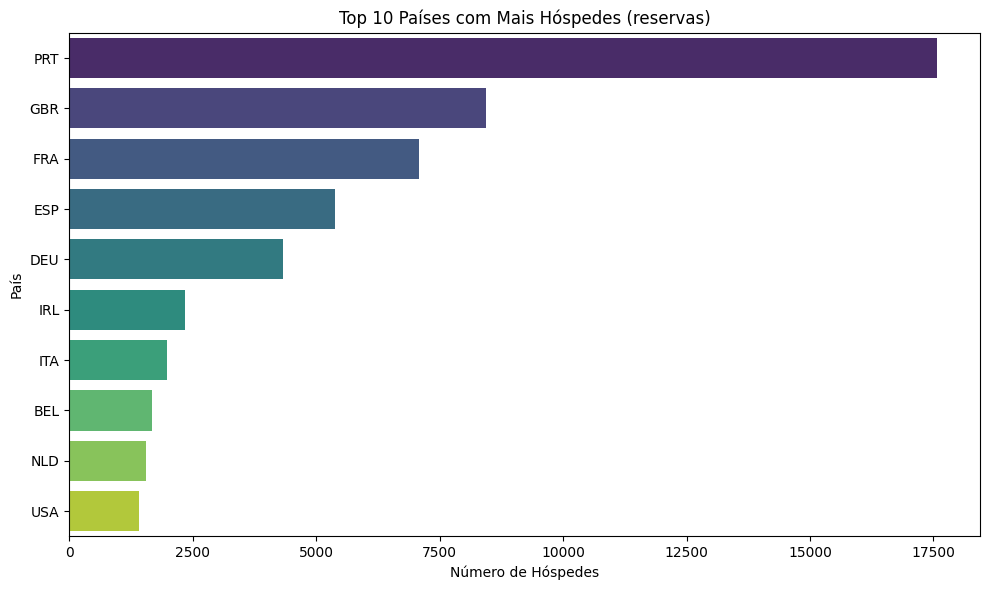

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='No of guests', data=top_countries, palette='viridis')
plt.title('Top 10 Países com Mais Hóspedes (reservas)')
plt.xlabel('Número de Hóspedes')
plt.ylabel('País')
plt.tight_layout()
plt.show()

###### Reservas x Número de crianças

<ipython-input-40-704596afb8ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_a_data['room_type'] = label_encoders['reserved_room_type'].inverse_transform(hotel_a_data['reserved_room_type'])


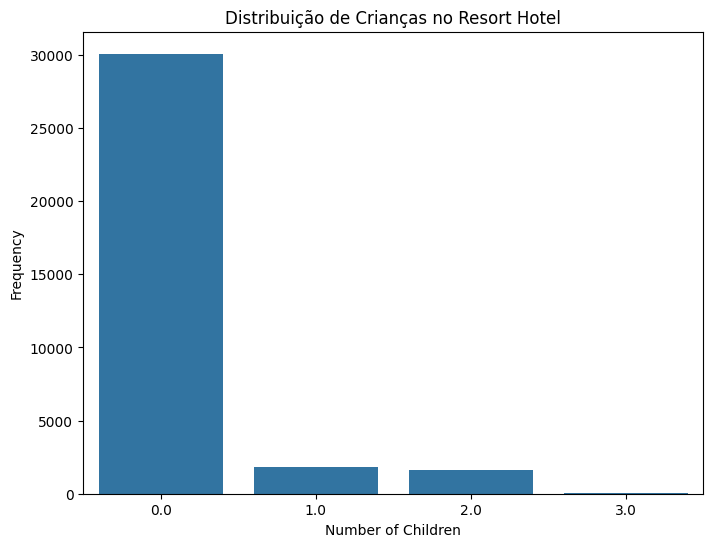

In [ ]:
hotel_a_data = hotel_raw_df[hotel_raw_df['hotel'] == 1]

hotel_a_data['room_type'] = label_encoders['reserved_room_type'].inverse_transform(hotel_a_data['reserved_room_type'])

plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=hotel_a_data)
plt.title('Distribuição de Crianças no Resort Hotel')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

<ipython-input-39-6c7e04eccb0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_a_data['room_type'] = label_encoders['reserved_room_type'].inverse_transform(hotel_a_data['reserved_room_type'])


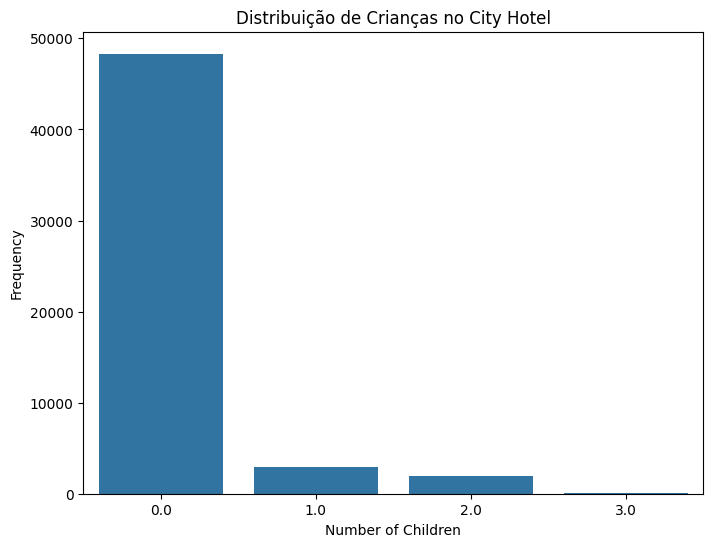

In [ ]:
hotel_a_data = hotel_raw_df[hotel_raw_df['hotel'] == 0]

hotel_a_data['room_type'] = label_encoders['reserved_room_type'].inverse_transform(hotel_a_data['reserved_room_type'])

plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=hotel_a_data)
plt.title('Distribuição de Crianças no City Hotel')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()


# Modelo de ML

In [ ]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country']

hotel_raw_df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
hotel_raw_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,342,5,27,1,0,0,2,0.0,...,0,0,0,2,0,2,0.0,0,0,121
1,1,0,737,5,27,1,0,0,2,0.0,...,0,0,0,2,0,2,0.0,0,0,121
2,1,0,7,5,27,1,0,1,1,0.0,...,0,0,0,0,0,2,75.0,0,0,122
3,1,0,13,5,27,1,0,1,1,0.0,...,0,0,0,0,0,2,75.0,0,0,122
4,1,0,14,5,27,1,0,2,2,0.0,...,0,0,0,0,0,2,98.0,0,1,123


In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
num_df.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,3,0,0.000000,0,0
1,6.603944,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,4,0,0.000000,0,0
2,2.079442,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0,4.330733,0,0
3,2.639057,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0,4.330733,0,0
4,2.708050,2015,3.332205,0.693147,0,2,2,0.0,0,0,0,0,0,0,4.595120,0,1


In [ ]:
num_df.var()

lead_time                           2.630749
arrival_date_year                   0.470498
arrival_date_week_number            0.455593
arrival_date_day_of_month           0.513347
stays_in_weekend_nights             1.049117
stays_in_week_nights                4.120996
adults                              0.385896
children                            0.207943
babies                              0.012908
is_repeated_guest                   0.037231
previous_cancellations              0.136768
previous_bookings_not_canceled      2.955749
booking_changes                     0.506173
days_in_waiting_list              100.568045
adr                                 0.616396
required_car_parking_spaces         0.078713
total_of_special_requests           0.692194
dtype: float64

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
num_df.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,3,0,0.000000,0,0
1,6.603944,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,4,0,0.000000,0,0
2,2.079442,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0,4.330733,0,0
3,2.639057,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0,4.330733,0,0
4,2.708050,2015,3.332205,0.693147,0,2,2,0.0,0,0,0,0,0,0,4.595120,0,1


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)

cat_df.head()
y = hotel_raw_df['is_canceled']

In [ ]:
X.shape, y.shape

((86753, 29), (86753,))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
101157,0,9,0,123,6,3,0,0,0,2,...,0.0,0,0,0,0,0,0,4.855929,0,3
103062,0,2,0,135,5,3,0,0,0,3,...,0.0,0,0,0,0,2,0,4.539564,0,0
4987,1,0,2,135,6,3,4,4,0,2,...,0.0,1,0,0,0,0,0,4.795791,0,0
82061,0,2,0,135,3,1,1,1,0,2,...,1.0,0,0,0,0,1,0,4.320816,0,1
9364,1,9,0,135,3,1,0,0,0,2,...,0.0,0,0,0,0,0,0,3.637586,0,0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)

conf = confusion_matrix(y_test, y_pred_lr)

clf_report = classification_report(y_test, y_pred_lr)

print(f"Scores da Validação Cruzada: {cv_scores}")
print(f"Média da pontuação de validação cruzada: {cv_scores.mean()}")

print(f"A Score da Acurácia da Regressão Logística foi : {acc_lr}")
print(f"Matriz de Confusão : \n{conf}")
print(f"Classification Report : \n{clf_report}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores da Validação Cruzada: [0.90564795 0.9005352  0.90201729 0.8923837  0.90177028]
Média da pontuação de validação cruzada: 0.9004708827015243
A Score da Acurácia da Regressão Logística foi : 0.9054791362483671
Matriz de Confusão : 
[[18030   733]
 [ 1727  5536]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     18763
           1       0.88      0.76      0.82      7263

    accuracy                           0.91     26026
   macro avg       0.90      0.86      0.88     26026
weighted avg       0.90      0.91      0.90     26026



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
